In [1]:
class Location(object):
    
    def __init__(self, x, y):
        self.x, self.y = x, y
        
    def move(self, deltaX, deltaY):
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox, oy = other.x, other.y
        xDist, yDist = self.x - ox, self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [2]:
class Field(object):
    def __init__(self):
        self.drunks = {}
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [3]:
import random

In [4]:
class Drunk(object):
    def __init__(self, name = None):
        self.name = name
    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

In [5]:
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)
        return random.choice(stepChoices)

In [6]:
def walk(f, d, numSteps):
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    Homer = dClass()
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1)) # with numTrials is bug
    return distances
def drunkTest(walkLengths, numTrials, dClass):
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))

In [7]:
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.66
 Max = 7.1 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 9.225
 Max = 21.5 Min = 0.0
UsualDrunk random walk of 1000 steps
 Mean = 28.154
 Max = 75.3 Min = 2.0
UsualDrunk random walk of 10000 steps
 Mean = 90.227
 Max = 247.6 Min = 8.0


In [8]:
drunkTest((0,1), 100, UsualDrunk)

UsualDrunk random walk of 0 steps
 Mean = 0.0
 Max = 0.0 Min = 0.0
UsualDrunk random walk of 1 steps
 Mean = 1.0
 Max = 1.0 Min = 1.0


In [9]:
class ColdDrunk(Drunk):
     def takeStep(self):
        stepChoices = [(0.0,1.0), (0.0,-2.0), (1.0, 0.0),\
                       (-1.0, 0.0)]
        return random.choice(stepChoices)

class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [10]:
def simAll(drunkKinds, walkLengths, numTrials):
        for dClass in drunkKinds:
            drunkTest(walkLengths, numTrials, dClass)

In [11]:
simAll((UsualDrunk, ColdDrunk, EWDrunk), (100, 1000), 10)

UsualDrunk random walk of 100 steps
 Mean = 6.75
 Max = 11.7 Min = 2.0
UsualDrunk random walk of 1000 steps
 Mean = 22.76
 Max = 42.0 Min = 7.2
ColdDrunk random walk of 100 steps
 Mean = 24.58
 Max = 50.0 Min = 6.1
ColdDrunk random walk of 1000 steps
 Mean = 260.67
 Max = 306.6 Min = 226.5
EWDrunk random walk of 100 steps
 Mean = 6.0
 Max = 14.0 Min = 0.0
EWDrunk random walk of 1000 steps
 Mean = 22.4
 Max = 60.0 Min = 2.0


In [12]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

In [13]:
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of', numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

In [14]:
import pylab

In [15]:
def simAll1(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'r:', 'k-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle,
                   label = dClass.__name__)
        pylab.title('Mean Distance from Origin ('
                     + str(numTrials) + ' trials)')
        pylab.xlabel('Number of Steps')
        pylab.ylabel('Distance from Origin')
        pylab.legend(loc = 'best')
        pylab.semilogx()
        pylab.semilogy()

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of EWDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


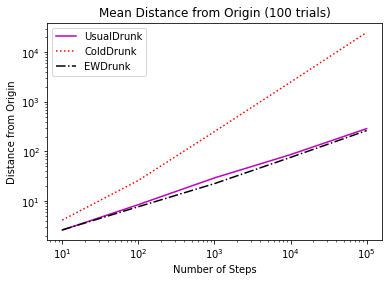

In [16]:
simAll1((UsualDrunk, ColdDrunk, EWDrunk),
(10,100,1000,10000,100000), 100)

In [17]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

In [18]:
def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        meanX = sum(xVals)/len(xVals)
        meanY = sum(yVals)/len(yVals)
        curStyle = styleChoice.nextStyle()
        pylab.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ + ' mean loc. = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
        pylab.title('Location at End of Walks ('
                     + str(numSteps) + ' steps)')
        pylab.xlabel('Steps East/West of Origin')
        pylab.ylabel('Steps North/South of Origin')
        pylab.legend(loc = 'lower left')

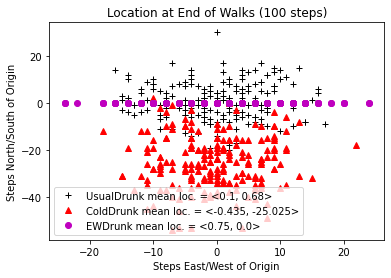

In [19]:
plotLocs((UsualDrunk, ColdDrunk, EWDrunk), 100, 200)

In [20]:
import random

In [21]:
def rollDie():
    return random.choice([1,2,3,4,5,6])
def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [22]:
rollN(10)

5141436642


In [23]:
def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

In [24]:
print('Mean =', flipSim(100, 10000)) 

Mean = 0.4997809999999996


In [25]:
def regressToMean(numFlips, numTrials):
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    extremes, nextTrials = [], []
    for i in range(len(fracHeads) - 1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])

    pylab.plot(range(len(extremes)), extremes, 'ko',
               label = 'Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^',
               label = 'Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0, 1)
    pylab.xlim(-1, len(extremes) + 1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')

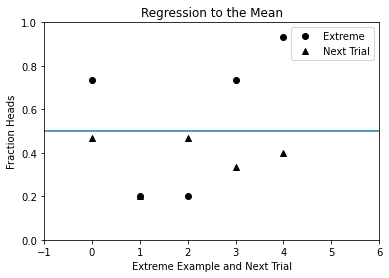

In [26]:
regressToMean(15, 40)

In [27]:
def variance(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)
def stdDev(X):
    return variance(X)**0.5

In [28]:
def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/float(numFlips)

In [29]:
def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

In [30]:
def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean = ' + str(round(mean, 4))\
                    + '\nSD = ' + str(round(sd, 4)), size='x-large',
    xycoords = 'axes fraction', xy = (0.67, 0.5))

In [31]:
def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin,xmax = pylab.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

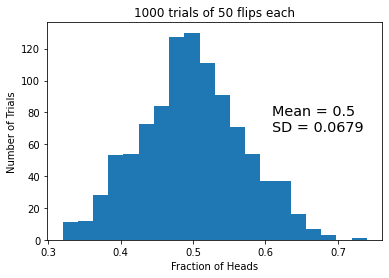

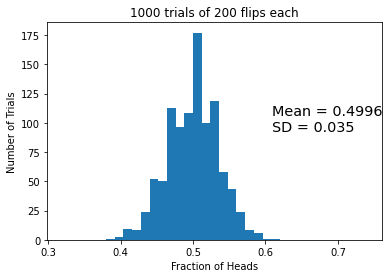

In [32]:
makePlots(50, 200, 1000)

In [33]:
def playSeries(numGames, teamProb):
    numWon = 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
    return (numWon > numGames//2)

def fractionWon(teamProb, numSeries, seriesLen):
    won = 0
    for series in range(numSeries):
        if playSeries(seriesLen, teamProb):
            won += 1
    return won/float(numSeries)

def simSeries(numSeries):
    prob = 0.5
    fracsWon, probs = [], []
    while prob <= 1.0:
        fracsWon.append(fractionWon(prob, numSeries, 7))
        probs.append(prob)
        prob += 0.01
    pylab.axhline(0.95) #Draw line at 95%
    pylab.plot(probs, fracsWon, 'k', linewidth = 5)
    pylab.xlabel('Probability of Winning a Game')
    pylab.ylabel('Probability of Winning a Series')
    pylab.title(str(numSeries) + ' Seven-Game Series')

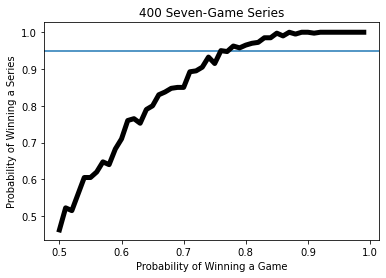

In [34]:
simSeries(400)

In [35]:
def rollDie():
    return random.choice([1,2,3,4,5,6])
def checkPascal(numTrials):
    numWins = 0
    for i in range(numTrials):
        for j in range(24):
            d1 = rollDie()
            d2 = rollDie()
            if d1 == 6 and d2 == 6:
                numWins += 1
                break
    print('Probability of winning =', numWins/numTrials)

In [36]:
checkPascal(10000)

Probability of winning = 0.4967


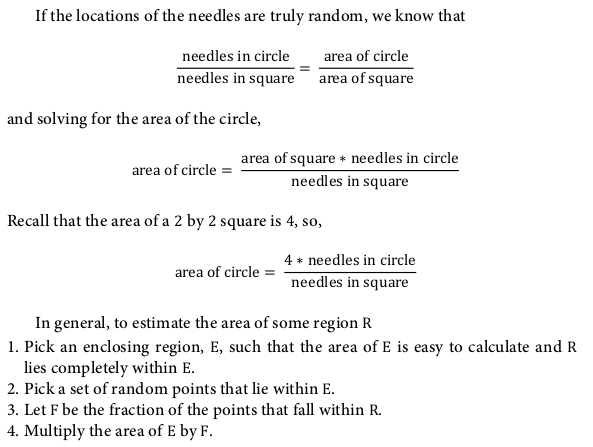

In [37]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1:
            inCircle += 1
    #Counting needles in one quadrant only, so multiply by 4
    return 4*(inCircle/numNeedles)

In [38]:
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = stdDev(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. =', str(round(curEst, 5)) + ',',
          'Std. dev. =', str(round(sDev, 5)) + ',',
          'Needles =', numNeedles)
    return (curEst, sDev)

In [39]:
def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev > precision/1.96:
        curEst, sDev = getEst(numNeedles, numTrials)
        numNeedles *= 2
    return curEst

In [40]:
estPi(0.01, 100)

Est. = 3.1356, Std. dev. = 0.0521, Needles = 1000
Est. = 3.14666, Std. dev. = 0.03586, Needles = 2000
Est. = 3.14582, Std. dev. = 0.02508, Needles = 4000
Est. = 3.14065, Std. dev. = 0.0196, Needles = 8000
Est. = 3.14187, Std. dev. = 0.01238, Needles = 16000
Est. = 3.14132, Std. dev. = 0.00886, Needles = 32000
Est. = 3.14103, Std. dev. = 0.00573, Needles = 64000
Est. = 3.14142, Std. dev. = 0.00437, Needles = 128000


3.141417812499999

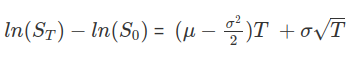

Text(0.5, 1.0, 'Geometric Brownian Motion')

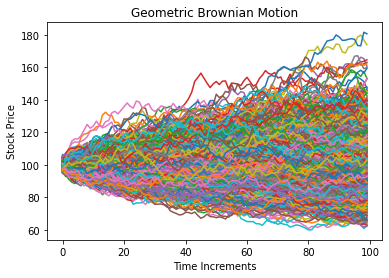

In [41]:
import numpy as np
import matplotlib.pyplot as plt


def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [42]:
import numpy as np
from scipy.stats import norm

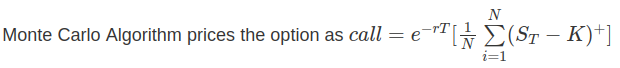

In [43]:
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call



payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 3.7451887662410783
Simulated price is 3.8499896061192627


In [44]:
N=100000
paths= geo_paths(S, T, r, q,sigma, steps, N)
payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.exp(-r*T)*np.mean(payoffs)

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 3.7451887662410783
Simulated price is 3.7986485992372394


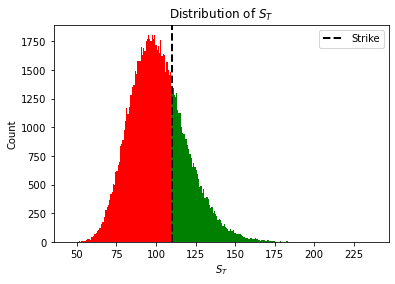

In [45]:
n, bins, patches = plt.hist(paths[-1],bins=250)
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()